In [3]:
import pandas as pd

pd.options.plotting.backend = "plotly"


def parse_millisecond_timestamp(ts):
    """Convert ms since Unix epoch to UTC datetime instance."""
    return pd.to_datetime(ts, unit="ms")

In [4]:
df = pd.read_csv(
    "data/groupby/news.csv",
    sep="\t",
    header=None,
    index_col=0,
    names=["title", "url", "outlet", "category", "cluster", "host", "tstamp"],
    parse_dates=["tstamp"],
    date_parser=parse_millisecond_timestamp,
    dtype={
        "outlet": "category",
        "category": "category",
        "cluster": "category",
        "host": "category",
    },
)
df.head(10)

,title,url,outlet,category,cluster,host,tstamp
1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,2014-03-10 16:52:50.698
2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,2014-03-10 16:52:51.207
3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-03-10 16:52:51.550
4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-03-10 16:52:51.793
5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,2014-03-10 16:52:52.027
6,Plosser: Fed May Have to Accelerate Tapering Pace,http://www.nasdaq.com/article/plosser-fed-may-...,NASDAQ,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.nasdaq.com,2014-03-10 16:52:52.212
7,Fed's Plosser: Taper pace may be too slow,http://www.marketwatch.com/story/feds-plosser-...,MarketWatch,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.marketwatch.com,2014-03-10 16:52:52.405
8,Fed's Plosser expects US unemployment to fall ...,http://www.fxstreet.com/news/forex-news/articl...,FXstreet.com,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.fxstreet.com,2014-03-10 16:52:52.615
9,US jobs growth last month hit by weather:Fed P...,http://economictimes.indiatimes.com/news/inter...,Economic Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,economictimes.indiatimes.com,2014-03-10 16:52:52.792
10,ECB unlikely to end sterilisation of SMP purch...,http://www.iii.co.uk/news-opinion/reuters/news...,Interactive Investor,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.iii.co.uk,2014-03-10 16:55:01.265


In [5]:
df.iloc[2]

title       US open: Stocks fall after Fed official hints ...
url         http://www.ifamagazine.com/news/us-open-stocks...
outlet                                           IFA Magazine
category                                                    b
cluster                         ddUyU0VZz0BRneMioxUPQVP6sIxvM
host                                      www.ifamagazine.com
tstamp                             2014-03-10 16:52:51.550000
Name: 3, dtype: object

In [6]:
df.shape

(422419, 7)

In [7]:
fdf = df.query('title.str.contains("Fed")')
fdf.shape

(3741, 7)

In [8]:
outlet_grp = fdf.groupby("outlet", sort=False)

In [9]:
outlet_grp.first()

,title,url,category,cluster,host,tstamp
outlet,,,,,,
Los Angeles Times,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,2014-03-10 16:52:50.698
Livemint,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,2014-03-10 16:52:51.207
IFA Magazine,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-03-10 16:52:51.550
Moneynews,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,2014-03-10 16:52:52.027
NASDAQ,Plosser: Fed May Have to Accelerate Tapering Pace,http://www.nasdaq.com/article/plosser-fed-may-...,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.nasdaq.com,2014-03-10 16:52:52.212
...,...,...,...,...,...,...
http\:\/\/citywire.lu,None,None,NaN,NaN,NaN,NaT
iStreet Research,None,None,NaN,NaN,NaN,NaT
iamWire,None,None,NaN,NaN,NaN,NaT


In [10]:
outlet_grp.last()

,title,url,category,cluster,host,tstamp
outlet,,,,,,
Los Angeles Times,Federal budget,http://www.latimes.com/nation/nationnow/la-na-...,b,d0sfyWjAYFsIGxMG1bMlmmRMN2ODM,www.latimes.com,2014-08-28 04:13:26.470
Livemint,S&P 500 nearly flat as investors digest Fed st...,http://www.livemint.com/Money/Tib3jbbxgywJ3hgL...,b,d2PUeHxkzWHiHIMS56XLaqxcsMEQM,www.livemint.com,2014-07-31 04:23:40.356
IFA Magazine,Federal Reserve moving closer to interest rate...,http://www.ifamagazine.com/news/federal-reserv...,b,dunL-T5pNDVbTpMZnZ-3oAUKlKybM,www.ifamagazine.com,2014-08-01 20:42:05.666
Moneynews,Financial Times: US Banks Could Lose $1 Trilli...,http://www.moneynews.com/StreetTalk/Fed-rates-...,b,dunL-T5pNDVbTpMZnZ-3oAUKlKybM,www.moneynews.com,2014-08-01 20:42:11.048
NASDAQ,"Futures Higher, S&P 500 On Track to Hit 2000; ...",http://www.nasdaq.com/article/futures-higher-s...,b,dIKJZFpKyVDG_tM8Q-AkpfgdzuRxM,www.nasdaq.com,2014-08-25 19:04:42.269
...,...,...,...,...,...,...
http\:\/\/citywire.lu,None,None,NaN,NaN,NaN,NaT
iStreet Research,None,None,NaN,NaN,NaN,NaT
iamWire,None,None,NaN,NaN,NaN,NaT


In [11]:
outlet_grp.ngroups

10985

In [12]:
top5Title = (
    outlet_grp.title.agg(["count"]).sort_values(by=["count"], ascending=False).head(5)
)

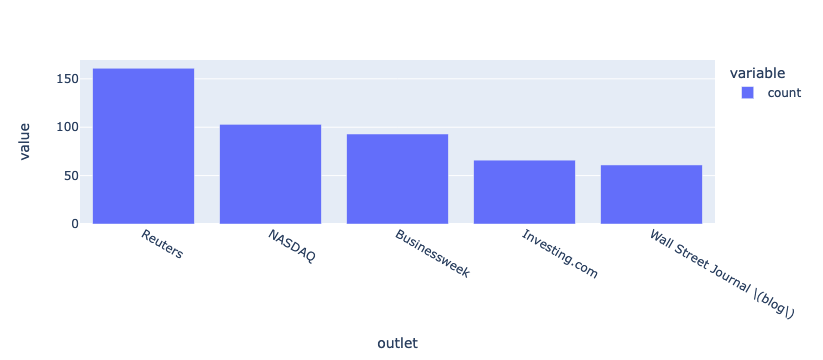

In [14]:
fig = top5Title.plot.bar()
fig.show()